In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import cartopy
import cartopy.crs as ccrs
from scipy.ndimage import gaussian_filter
import re
from scipy import stats 
from pylab import *

In [2]:
Data = pd.read_csv('Combined_HF_new_new.txt', sep=' ')
#Data = pd.read_csv('Gondwana_HF.txt', sep=' ')
print(Data.head())
print(Data.info())

       Lon      Lat     HF
0  18.8233  40.5217   48.0
1  18.7333  41.1000   84.0
2  18.7083  41.3500  104.0
3  20.0667  39.7000   35.0
4  20.1667  39.8167    2.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59184 entries, 0 to 59183
Data columns (total 3 columns):
Lon    59181 non-null float64
Lat    59182 non-null float64
HF     59184 non-null float64
dtypes: float64(3)
memory usage: 1.4 MB
None


In [3]:
Data = Data.dropna(subset=(['HF']))
Data.info()

North = Data.loc[(Data['Lat']>=-65)]
South = Data.loc[(Data['Lat']<-65)]

# North = Data.loc[(Data['latitude']>=-65)]
# South = Data.loc[(Data['latitude']<-65)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59184 entries, 0 to 59183
Data columns (total 3 columns):
Lon    59181 non-null float64
Lat    59182 non-null float64
HF     59184 non-null float64
dtypes: float64(3)
memory usage: 1.8 MB


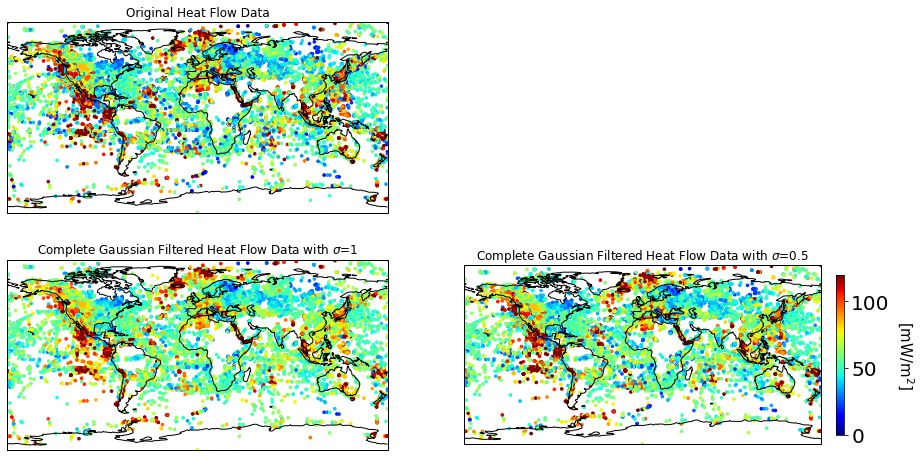

In [4]:
fig = plt.figure(figsize=(15,8))
result1 = gaussian_filter(North.HF, sigma=0.5)
result2 = gaussian_filter(Data.HF, sigma=1)
result3 = gaussian_filter(Data.HF, sigma=0.5)

result = np.append(result1,South.HF)
#result_Lon = np.append(North.Lon, South.Lon)
#result_Lat = np.append(North.Lat, South.Lat)

result_Lon = np.append(North.Lon, South.Lon)
result_Lat = np.append(North.Lat, South.Lat)

ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
plt.scatter(Data.Lon,Data.Lat, c=Data.HF,cmap='jet', marker='o', s=7, vmin=0, vmax=120)
plt.title('Original Heat Flow Data')



ax2 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax2.coastlines()
plt.scatter(Data.Lon,Data.Lat, c=result2,cmap='jet', marker='o', s=7, vmin=0, vmax=120)
plt.title('Complete Gaussian Filtered Heat Flow Data with $\sigma$=1')

# ax3 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
# ax3.coastlines()
# plt.scatter(result_Lon,result_Lat, c=result,cmap='jet', marker='o', s=7, vmin=0, vmax=120)
# plt.title('Gaussian filtered Heat Flow Data for Lat>-65 with $\sigma$=1')

ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines()
plt.scatter(Data.Lon,Data.Lat, c=result3,cmap='jet', marker='o', s=7, vmin=0, vmax=120)
plt.title('Complete Gaussian Filtered Heat Flow Data with $\sigma$=0.5')

cb = plt.colorbar(fraction=0.021, pad=0.04)  
cb.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
cb.ax.tick_params(labelsize=20)

fig.savefig('Gaussian_Filter_Gondwana.png', dpi=300)
plt.show()

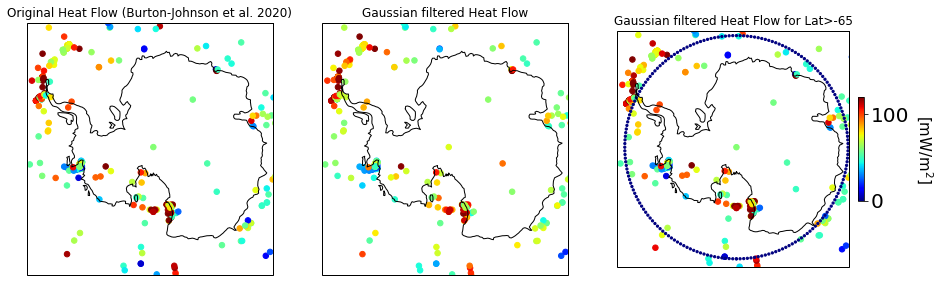

In [5]:
Longi=np.arange(-180,180+1.875,1.875)
Latti=np.full((1,193),-65)
f=np.zeros(193)

fig1 = plt.figure(figsize=(15,8))

ax0 = plt.subplot(1, 3, 1,projection=ccrs.Orthographic(central_latitude=-90.0))
ax0.coastlines(resolution='110m', zorder=3) 
ax0.set_global()
extent0 = [-180, 180, -63, -90]
ax0.set_extent(extent0, ccrs.PlateCarree())
plt.scatter(Data.Lon,Data.Lat, c=Data.HF,cmap='jet', marker='o', s=30, vmin=0, vmax=120,transform=ccrs.PlateCarree())
plt.title('Original Heat Flow (Burton-Johnson et al. 2020)')

ax = plt.subplot(1, 3, 2,projection=ccrs.Orthographic(central_latitude=-90.0))
ax.coastlines(resolution='110m', zorder=3) 
ax.set_global()
extent = [-180, 180, -63, -90]
ax.set_extent(extent, ccrs.PlateCarree())
plt.scatter(Data.Lon,Data.Lat, c=result2,cmap='jet', marker='o', s=30, vmin=0, vmax=120,transform=ccrs.PlateCarree())
plt.title('Gaussian filtered Heat Flow')

ax1 = plt.subplot(1, 3, 3,projection=ccrs.Orthographic(central_latitude=-90.0))
ax1.coastlines(resolution='110m', zorder=3) 
ax1.set_global()
extent1 = [-180, 180, -63, -90]
ax1.set_extent(extent1, ccrs.PlateCarree())
plt.scatter(result_Lon,result_Lat, c=result,cmap='jet', marker='o', s=30, vmin=0, vmax=120,transform=ccrs.PlateCarree())
plt.scatter(Longi,Latti, c=f,cmap='jet', marker='.', s=20, vmin=0, vmax=120,transform=ccrs.PlateCarree())
plt.title('Gaussian filtered Heat Flow for Lat>-65')


cb = plt.colorbar(fraction=0.021, pad=0.04)  
cb.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
cb.ax.tick_params(labelsize=20)

fig1.savefig('Gaussian_Filter_ANT.png')
plt.show()

In [6]:
Gudrun=np.vstack((result_Lon, result_Lat, result)).T
np.savetxt('Gaussian_Filtered_HF_Gondwana.txt', Gudrun, header='Lon Lat HF', fmt='%.3f')

In [ ]:
Data= np.loadtxt('Gaussian_Filtered_HF_Gondwana.txt')
Lon = Data[:,0]
Lat=Data[:,1]
HF=Data[:,2]
fig1 = plt.figure(figsize=(15,8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.scatter(Lon,Lat, c=HF,cmap='jet', marker='o', s=10, vmin=0, vmax=120)
plt.title('Original Heat Flow Data')